# binomial distribution:

## dbinom(vectorOfQuantiles, numOfTrials, probOfSuccessOnEachTrial)

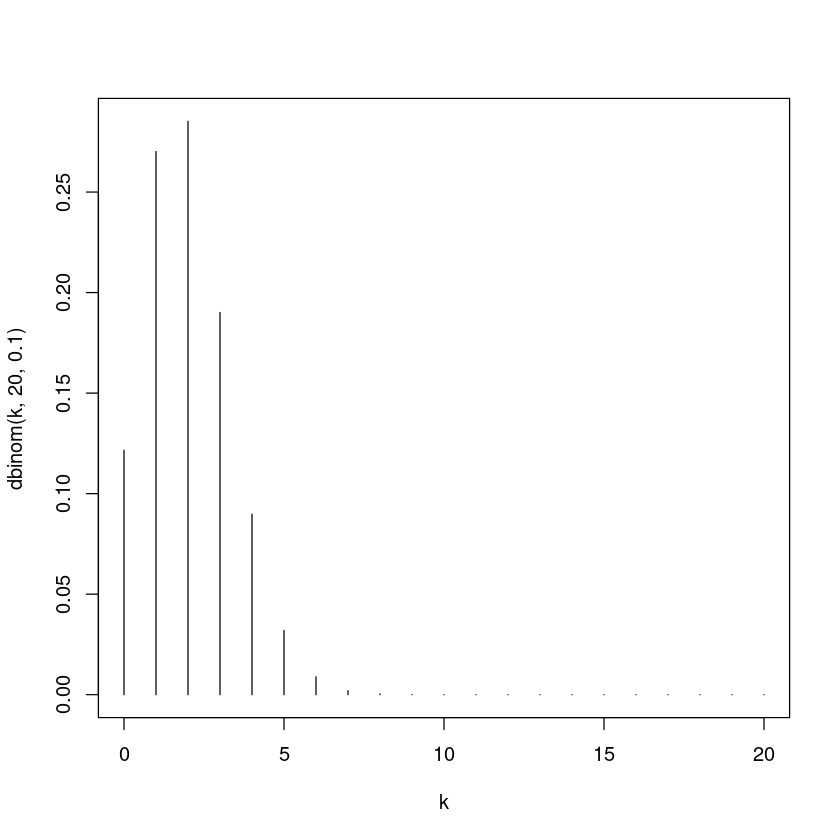

In [3]:
k=0:20
plot(k, dbinom(k, 20, 0.1), type="h")

## pbinom(vectorOfQuantiles, numOfTrials, probOfSuccessOnEachTrial)

In [4]:
#cumulative probability of having at least 8 successes when 
#the probability of successes on each trial is 0.3
pbinom(8, 20, 0.3)

[1] 0.8866685

## qbinom(vectorOfProbabilities, numOfTrials, probOfSuccessOnEachTrial)

In [5]:
#the largest number of successes such that cumulative
#probability is not greater than 0.886668537123022
qbinom(0.886668537123022, 20, 0.3)

[1] 8

## rbinom(numOfObservations, numOfTrials, probOfSuccessOnEachTrial)

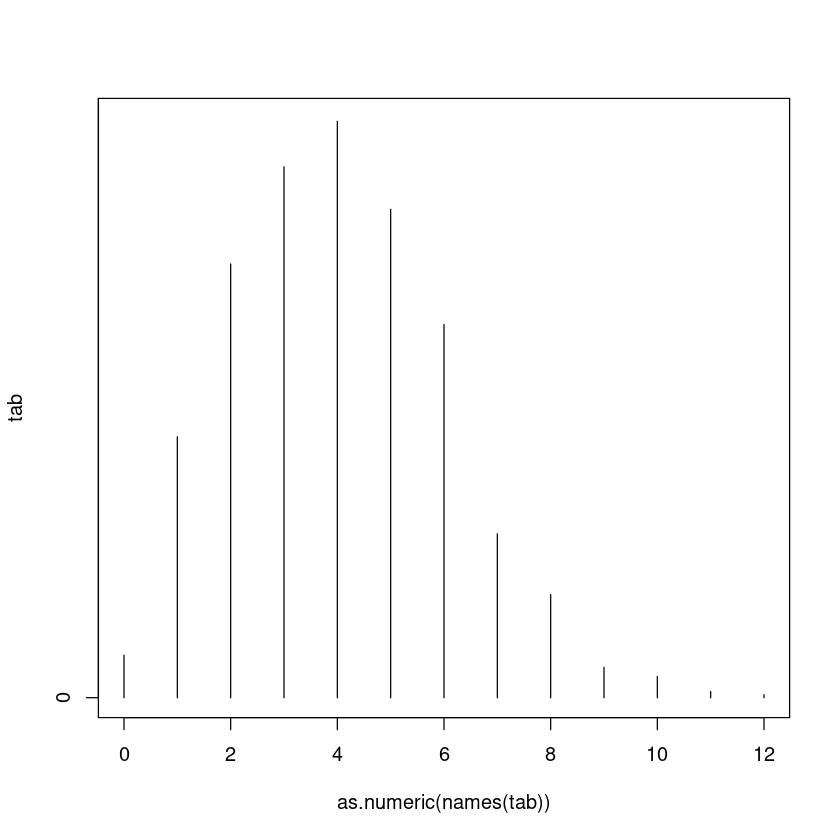

In [7]:
sim = rbinom(1000, 1000, 0.004)
tab = table(sim)/length(sim)
plot(as.numeric(names(tab)), tab, type="h")

# poisson distribution

## dpois(NonNegativeIntegerQuantiles, lambdaNonNegativeMeans)

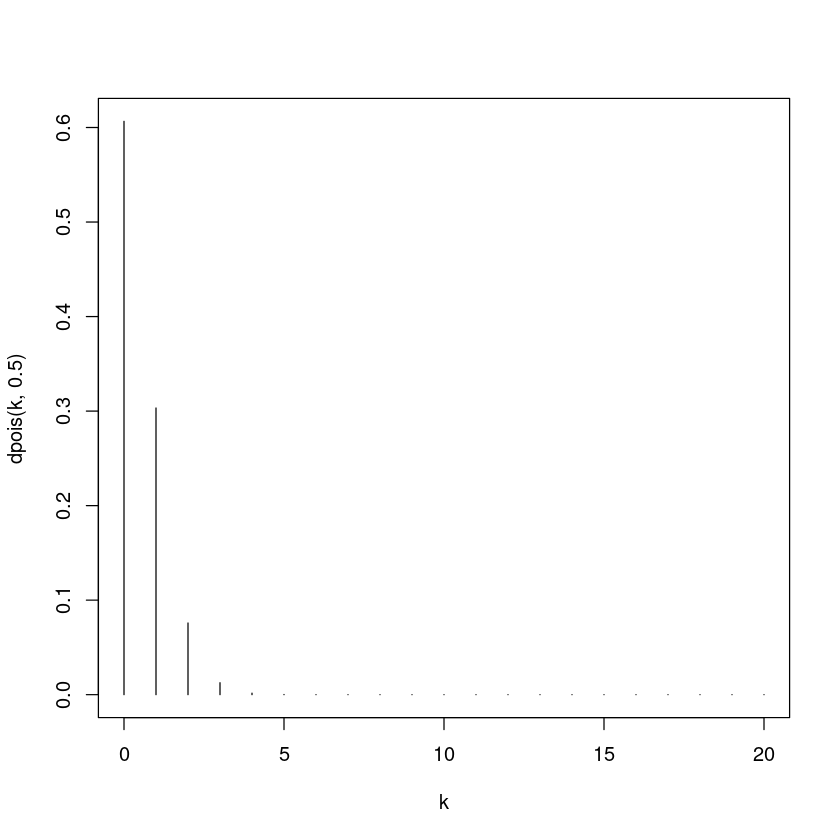

In [8]:
k=seq(0, 20)
plot(k, dpois(k, 0.5), type="h")

## ppois(quantiles, lambda)

In [10]:
ppois(20, 0.5)

[1] 1

In [11]:
ppois(20, 10)

[1] 0.9984117

## qpois(probabilities, lambda)

In [12]:
qpois(1, 0.5)

[1] Inf

In [13]:
qpois(0.998411739338142, 10)

[1] 20

## rpois(numOfRandomValuesToReturn, lambda)

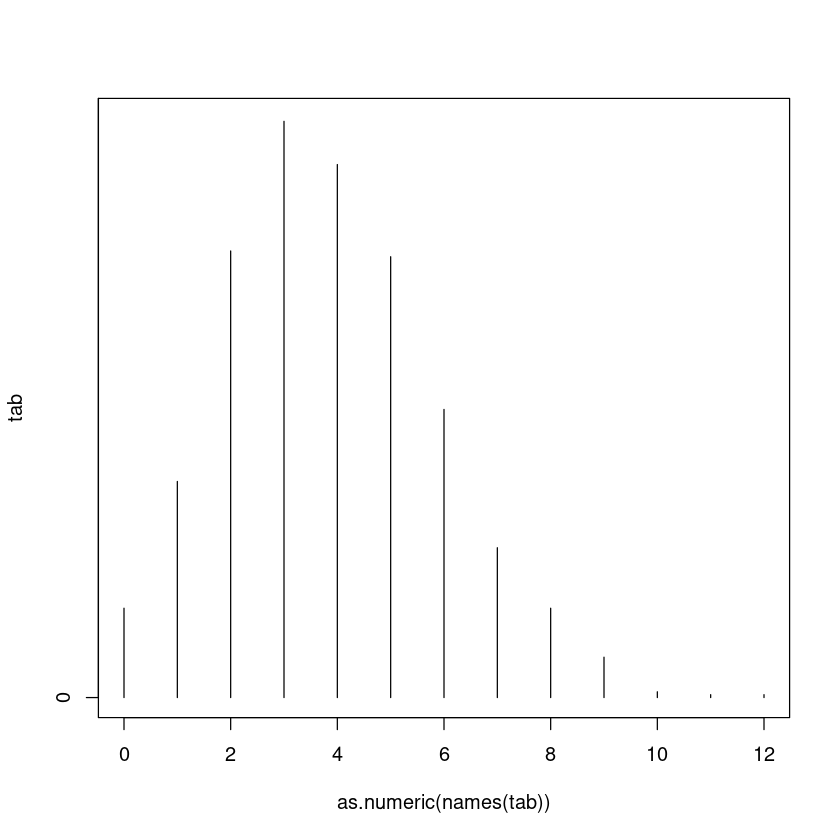

In [15]:
sim=rpois(1000, 4)
tab=table(sim)/length(sim)
plot(as.numeric(names(tab)), tab, type="h")

# normal distribution

## dnorm(quantiles, mean, sd)

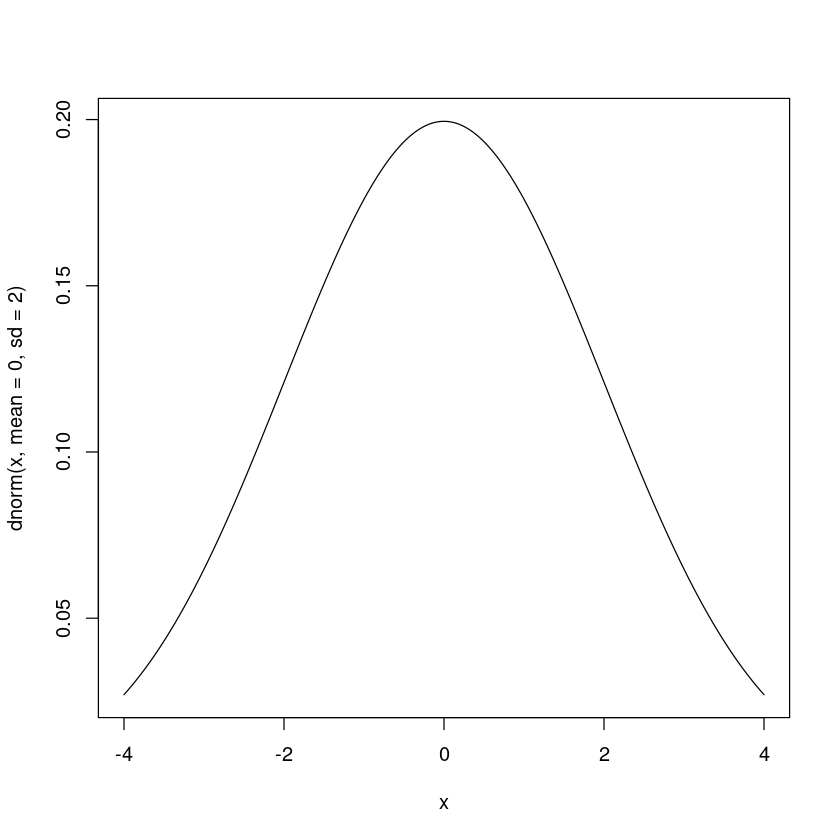

In [3]:
x=seq(-4, 4, length=500)
plot(x, dnorm(x, mean=0, sd=2), type="l")

## pnorm(quantiles, mean, sd)

In [6]:
c(pnorm(-1.96, 0, 1), pnorm(1.96, 0, 1))

[1] 0.0249979 0.9750021

## qnorm(probabilities, mean, sd)

In [5]:
#95% fo the values are located in the interval [-1.96, +1.96]
#for a standard normal random variable
c(round(qnorm(0.025, 0, 1), 3), round(qnorm(0.975, 0, 1), 3))

[1] -1.96  1.96

## rnorm(numOfObservations, mean, sd)

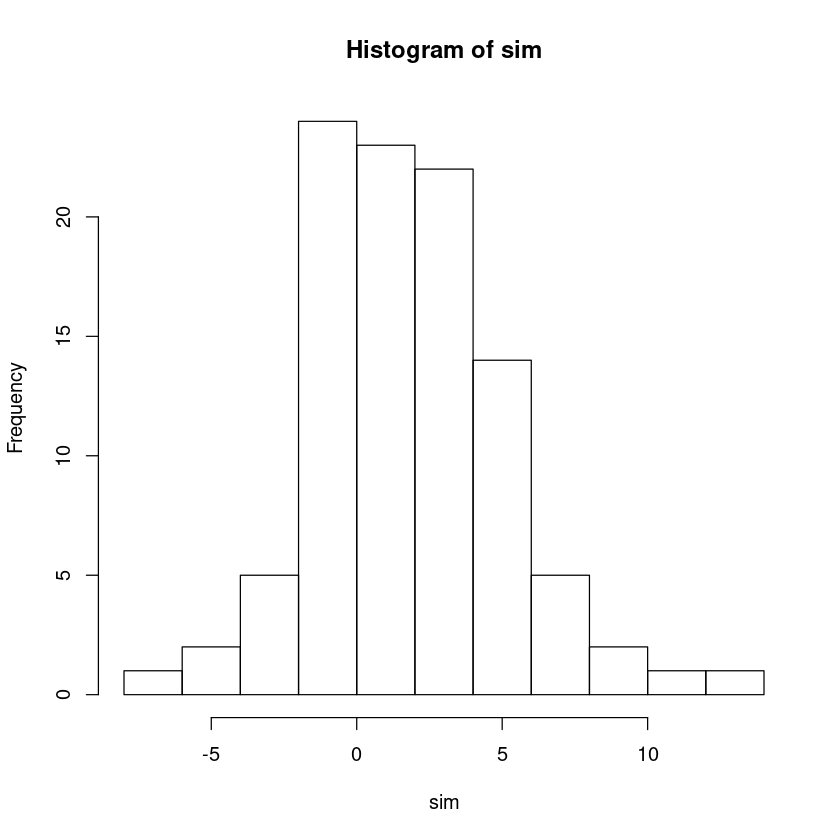

In [7]:
#histogram
sim = rnorm(100, 2, 4)
hist(sim)

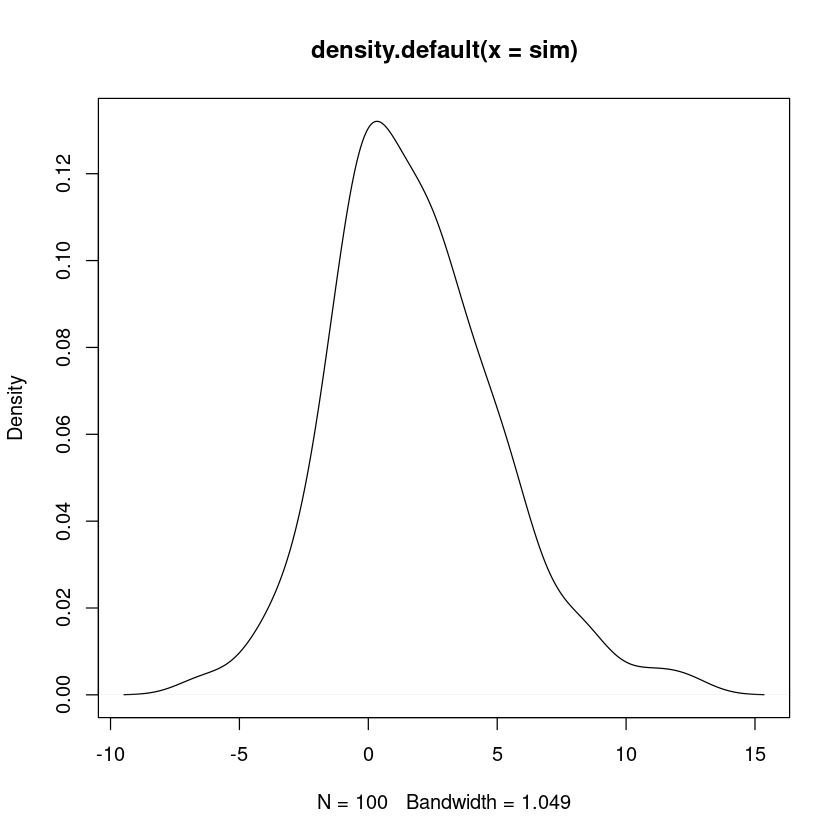

In [8]:
#density plot
plot(density(sim))

## qqnorm(y); qqline(y)

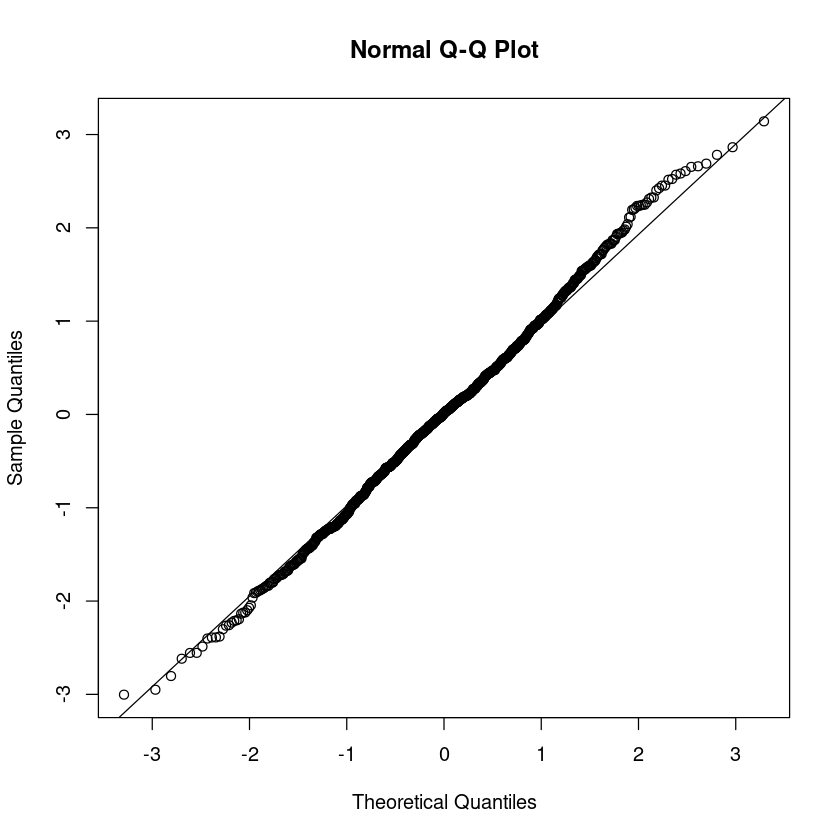

In [10]:
n = rnorm(1000)
qqnorm(n); qqline(n)

# t-test

## boxplot(response~predicator)
## t.test(response~predicator, data=data, var.equal=TRUE, alternative="greater/less/two-sided(default)")

p value is equal to:
## \alpha(surprisal)=pt(quantile(t-value), degreeOfFreedom)
e.g. we have two samples, n A = 40 , n B = 60 , and we want strong evidence so we set α = 0.005 ; we observe that t = 2.9 .
2*(1-pt(2.9, 98))
yields 0.046, which is below 0.005, so we concluded indeed there may be difference between the two means

Welch two-sample t-test (default t-test in r) (when there may be a difference in variances)
## t.test(response~predictor, data= data, alternative="two.sided")

# chi-squared distribution

for datasets not following normal distribution

## rchisq(numOfObservations, degreeOfFreedom)

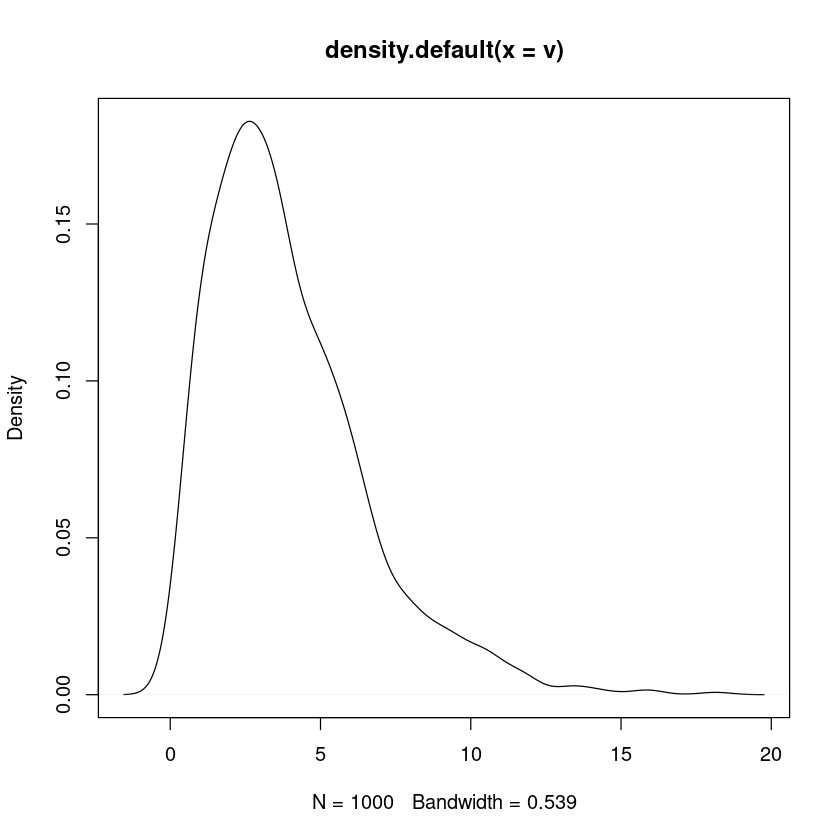

In [14]:
v = rchisq(1000, 4)
plot(density(v))

## chisq.test(data)
for clarifying whether there are surprise-worthy non-
proportionalities in contingency tables

In [19]:
#load dataset
library(languageR)
data(auxiliaries)
head(auxiliaries)
#cross-tabulation
xt = xtabs(~ Aux + Regularity, data = auxiliaries)
xt

,Verb,Aux,VerbalSynsets,Regularity
,<fct>,<fct>,<int>,<fct>
1,blijken,zijn,1,irregular
2,gloeien,hebben,3,regular
3,glimmen,zijnheb,2,irregular
4,rijzen,zijn,4,irregular
5,werpen,hebben,3,irregular
6,delven,hebben,2,irregular


         Regularity
Aux       irregular regular
  hebben         94     118
  zijn           12       3
  zijnheb        36      22

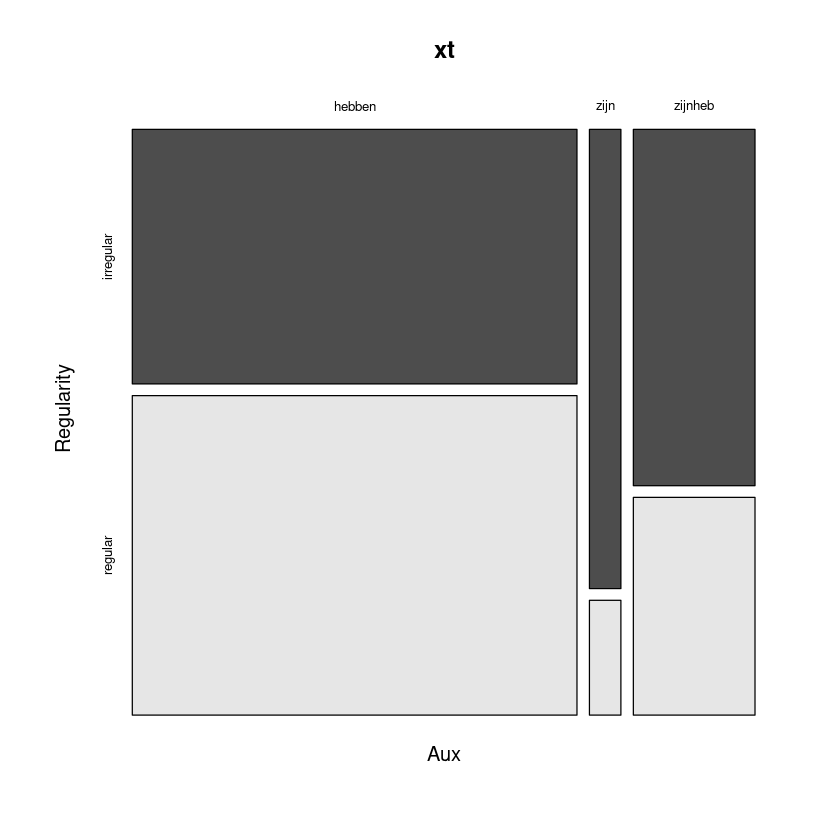

In [20]:
#mosaic plot
mosaicplot(xt, col=TRUE)

In [22]:
chisq.test(xt)


	Pearson's Chi-squared test

data:  xt
X-squared = 11.493, df = 2, p-value = 0.003194


In [23]:
x = chisq.test(xt)
x$observed

         Regularity
Aux       irregular regular
  hebben         94     118
  zijn           12       3
  zijnheb        36      22

In [24]:
x$expected

,irregular,regular
hebben,105.628070,106.371930
zijn,7.473684,7.526316
zijnheb,28.898246,29.101754


## wilcox.test(response~predictor, data=data)
for small sample size, non-normally distributed or many outliers

# Gaussian regression model

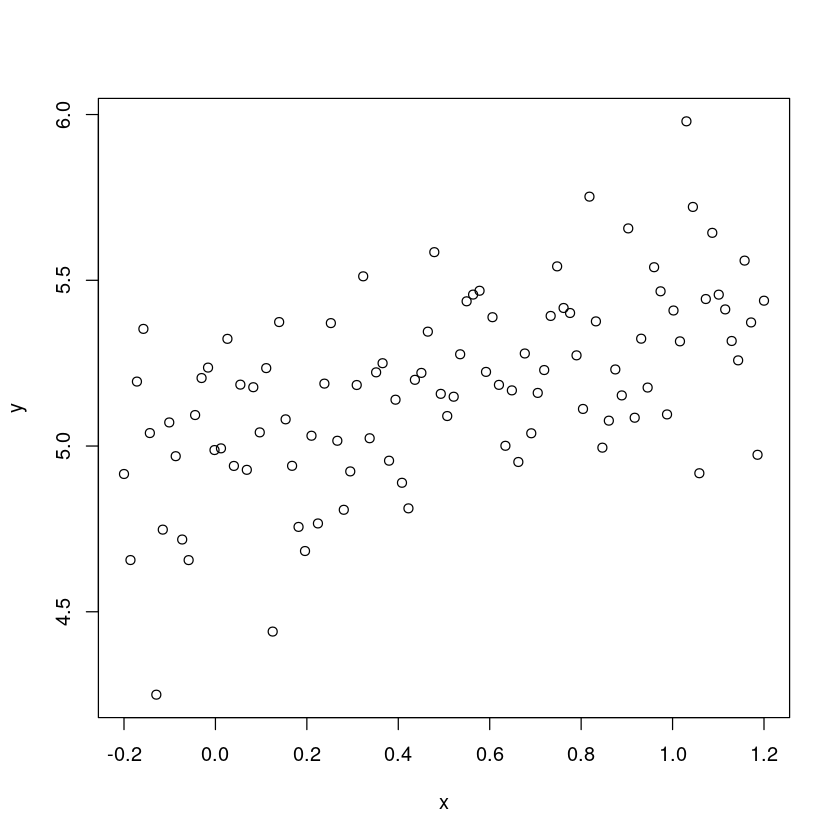

In [2]:
nx = 100
x = seq(-0.2, 1.2, len=nx)
intercept = 5
slope = 0.4
stdev = 0.2
y = intercept + slope * x + rnorm(nx, 0, stdev)
plot(x, y, type="p")

In [3]:
dat = data.frame(y = y, x = x)
head(dat)

,y,x
,<dbl>,<dbl>
1,4.915656,-0.2000000
2,4.656071,-0.1858586
3,5.194452,-0.1717172
4,5.353391,-0.1575758
5,5.039147,-0.1434343
6,4.249974,-0.1292929


In [4]:
#fit linear regression model
dat.lm = lm(y ~ x, data = dat)
summary(dat.lm)


Call:
lm(formula = y ~ x, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68607 -0.16959  0.00388  0.13507  0.60170 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.98530    0.03697 134.861  < 2e-16 ***
x            0.38093    0.05727   6.652 1.66e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2338 on 98 degrees of freedom
Multiple R-squared:  0.311,	Adjusted R-squared:  0.304 
F-statistic: 44.24 on 1 and 98 DF,  p-value: 1.664e-09


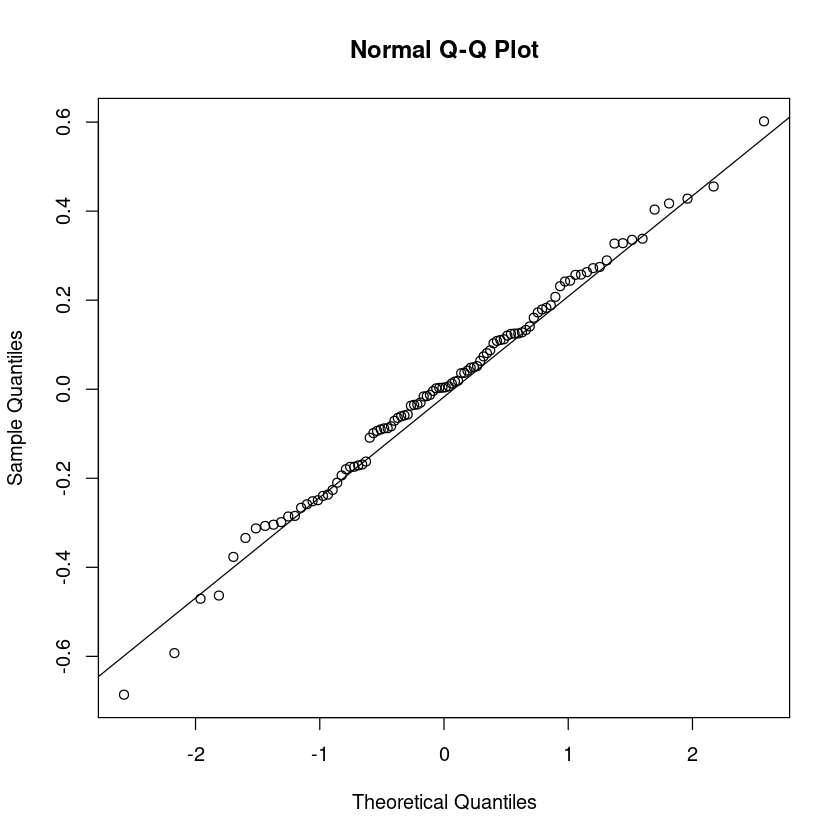

In [5]:
#the residuals should follow a normal distribution
qqnorm(resid(dat.lm))
qqline(resid(dat.lm))

In [8]:
#test of normality on the residuals (adequate if p value < 0.1)
shapiro.test(resid(dat.lm))


	Shapiro-Wilk normality test

data:  resid(dat.lm)
W = 0.99309, p-value = 0.8937
